In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("store_sharing.csv")

In [3]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


burda timestamp columu object gozukuyo fakat bunu datetime tipine cevirmemiz gerekecek

In [6]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [7]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [9]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='season', ylabel='count'>

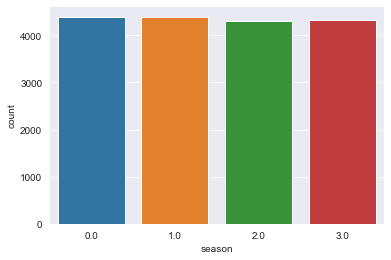

In [10]:
# Let's find the number of registrations by season 
#season
 
sns.countplot("season", data=df)

<AxesSubplot:xlabel='is_holiday', ylabel='count'>

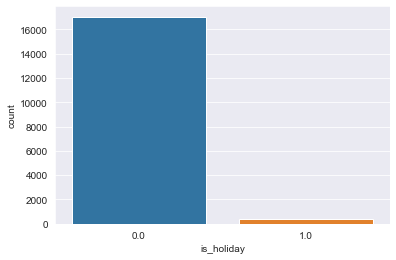

In [11]:
#holiday
# registration numbers on holidays

sns.countplot("is_holiday", data=df)

1= holiday , 0= nonholiday. So holiday time no register

<AxesSubplot:xlabel='is_weekend', ylabel='count'>

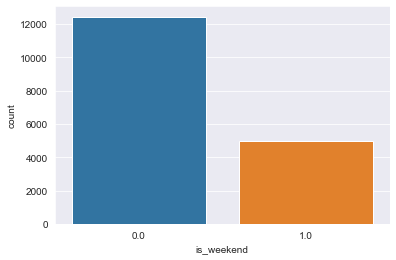

In [12]:
#is_weekend
#lets check weekend register count
sns.countplot("is_weekend", data=df)


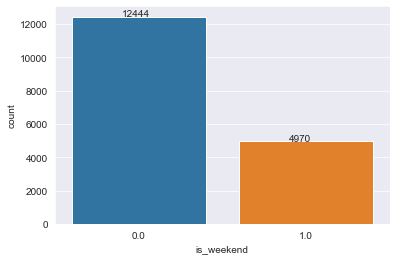

In [13]:
#with annotate
ax = sns.countplot("is_weekend", data=df);  # bu plotu bir axes'e atadık ki onun patch'ini alıp for döngüsüne sokabilelim.

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.3, p.get_height()+20));
    

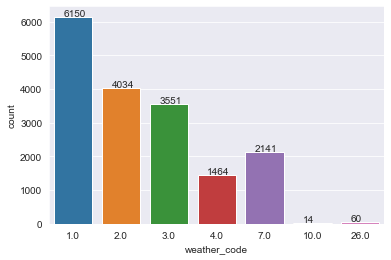

In [14]:
#weather_code
ax = sns.countplot("weather_code", data=df);

for p in ax.patches:
    ax.annotate( str(p.get_height()),(p.get_x()+0.2, p.get_height()+20));


"weather_code" category description:

1 = Clear ; mostly clear but have some values with haze/fog/patches of 
fog/ fog in vicinity

2 = scattered clouds / few clouds

3 = Broken clouds

4 = Cloudy

7 = Rain/ light Rain shower/ Light rain

10 = rain with thunderstorm

26 = snowfall

94 = Freezing Fog

# Look at the data type of each variable, transform timestamp in type, and set it as index.

In [16]:
df.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [17]:
df.timestamp = pd.to_datetime(df.timestamp)
# will loop through the timestamp column itself and convert each to datetime. 
#(We converted it to datetime and assigned it to itself again.)

In [18]:
df.set_index("timestamp", inplace=True)
df.head()
#I indexed the timestamp column

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


I have a 2 year timestamp.Let's do feature enginering by getting year,month,day_of_month,day_of_week,hour information

# Make feature engineering.Extract new columns(day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [19]:
df['year'] = df.index.year
#I took the year parts of the index and created a new column named year

In [20]:
df["month"] = df.index.month
df["day_of_month"] = df.index.day
df["day_of_week"] = df.index.dayofweek
df["hour"] = df.index.hour

df["year-month"]  = df.index.strftime("%Y-%m") 

In [21]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour,year-month
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,6,0,2015-01
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,6,1,2015-01
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,2,2015-01
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,3,2015-01
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,6,4,2015-01


# Visualize the correlation with heatmap

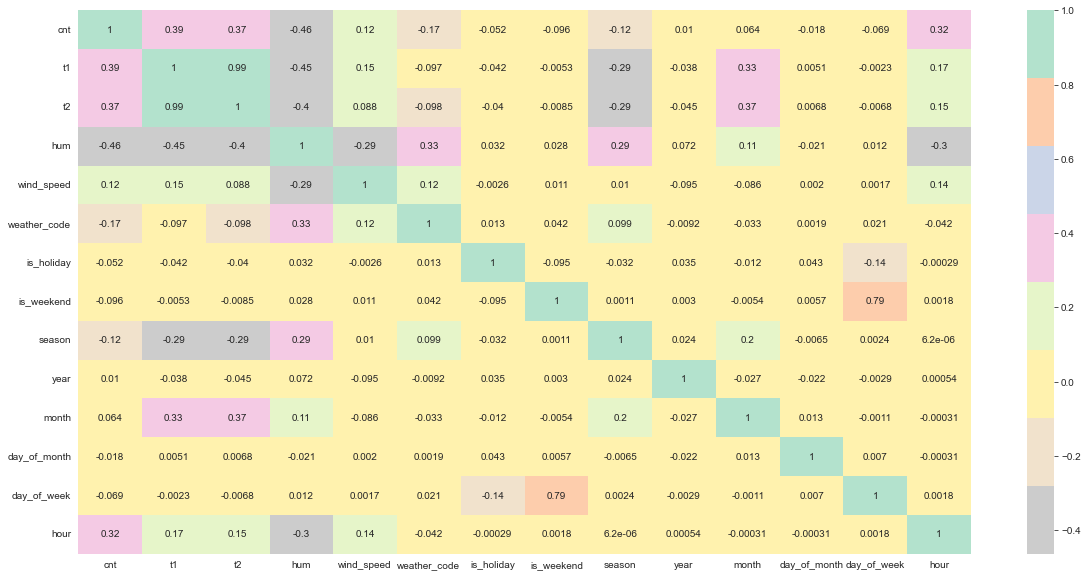

In [27]:
#for all variables
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap='Pastel2_r',annot=True);

<AxesSubplot:>

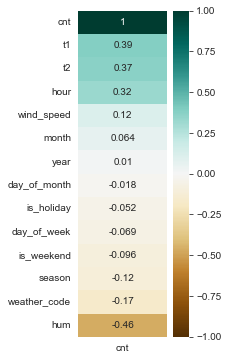

In [28]:
#for the target variable
plt.figure(figsize=(2,6))

sns.heatmap(df.corr()[["cnt"]].sort_values(by="cnt", ascending=False), cmap="BrBG", 
            annot=True, vmin=-1, vmax=1)
#I sorted the corr values from largest to smallest.

# Visualize the corr of the target variable and the other features with barplot

In [29]:
df.corr()[["cnt"]].sort_values(by='cnt',ascending=True)

,cnt
hum,-0.462901
weather_code,-0.166633
season,-0.116180
is_weekend,-0.096499
day_of_week,-0.068688
is_holiday,-0.051698
day_of_month,-0.017887
year,0.010046
month,0.063757
wind_speed,0.116295


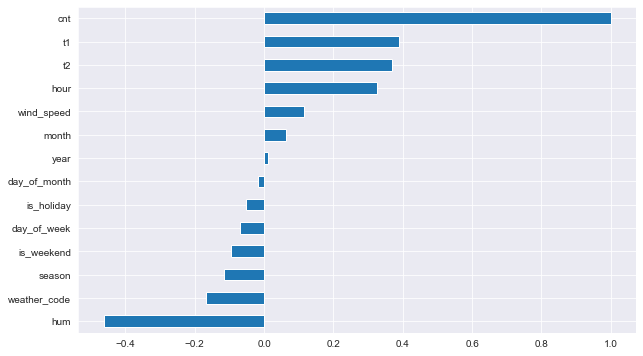

In [30]:
#with pandas
plt.figure(figsize=(10,6))
df.corr().cnt.sort_values().plot.barh()
plt.show()

# Plot bike shares over time use lineplot 

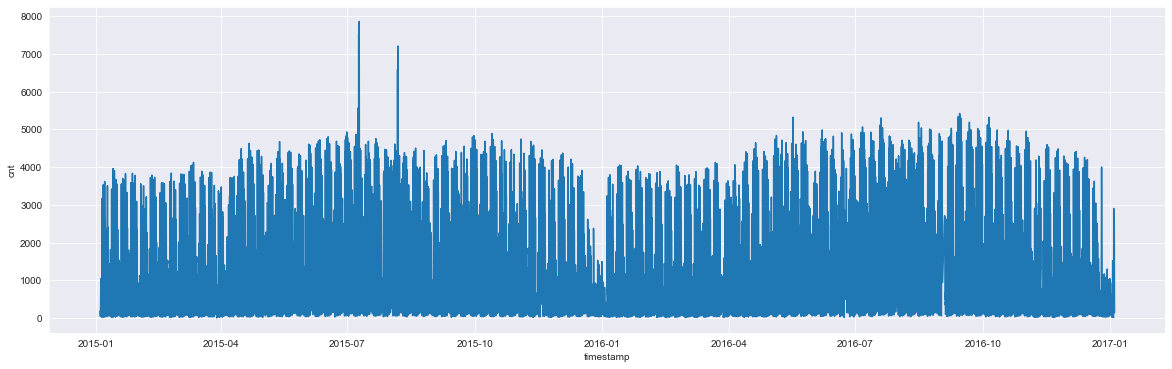

In [31]:
plt.figure(figsize=(20,6))

sns.lineplot(x=df.index, y="cnt", data=df);

# Plot bike shares by months and year_of_months(use lineplot,pointplot,barplot)

In [33]:
# Let's see the sum of the count numbers by months
df.groupby("year-month").cnt.sum()

year-month
2015-01     546639
2015-02     543594
2015-03     695934
2015-04     831582
2015-05     895413
2015-06    1033252
2015-07    1120687
2015-08    1033951
2015-09     892478
2015-10     865046
2015-11     677332
2015-12     602838
2016-01     582518
2016-02     592910
2016-03     656527
2016-04     768845
2016-05    1001935
2016-06     933878
2016-07    1165527
2016-08    1137314
2016-09     998619
2016-10     935706
2016-11     703859
2016-12     651908
2017-01      37680
Name: cnt, dtype: int64

In [34]:
df_sum = pd.DataFrame(df.groupby("year-month").cnt.sum())
# I created a new DataFrame with the above information.

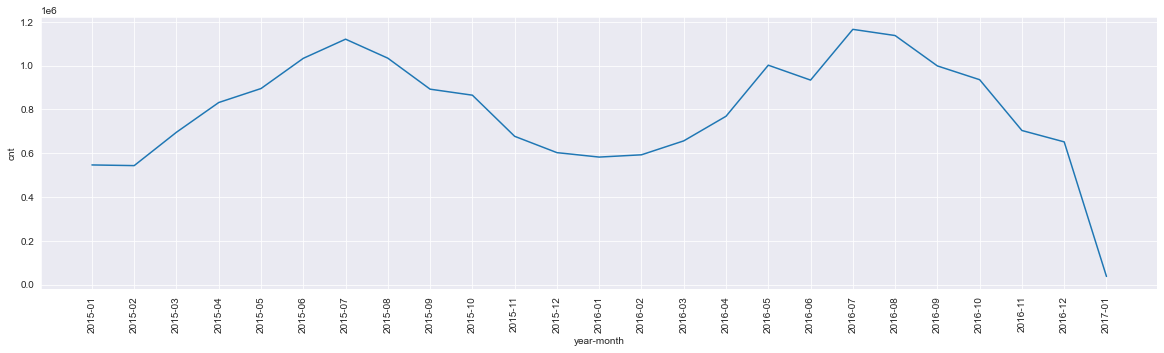

In [35]:
# with lineplot

plt.figure(figsize=(20,5))

sns.lineplot(x="year-month",y="cnt", data = df_sum)
plt.xticks(rotation=90);


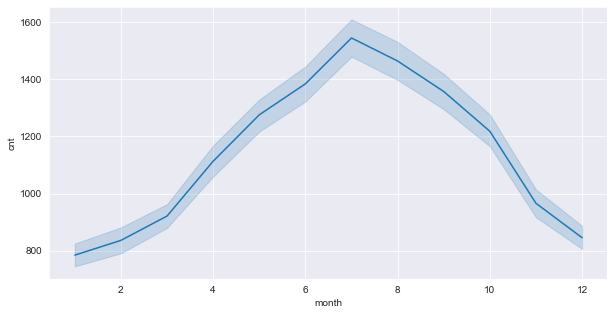

In [37]:
# with lineplot

plt.figure(figsize=(10,5))
sns.lineplot(x = "month", y = "cnt", data=df);

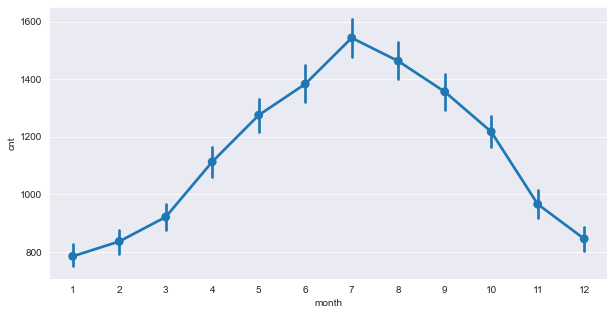

In [38]:
# with pointplot

plt.figure(figsize=(10,5))
sns.pointplot(x = "month", y = "cnt", data=df);

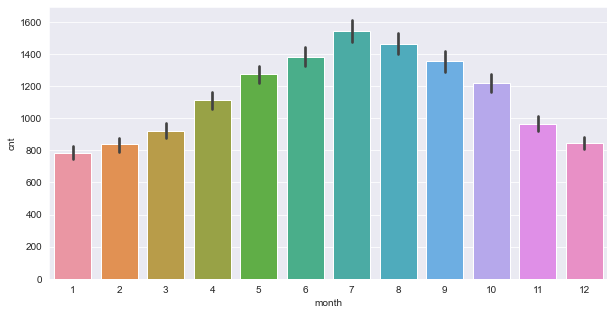

In [39]:
# with barplot

plt.figure(figsize=(10,5))
sns.barplot(x = "month", y = "cnt", data=df, ci=95);
#The confidence interval was accepted as 95.

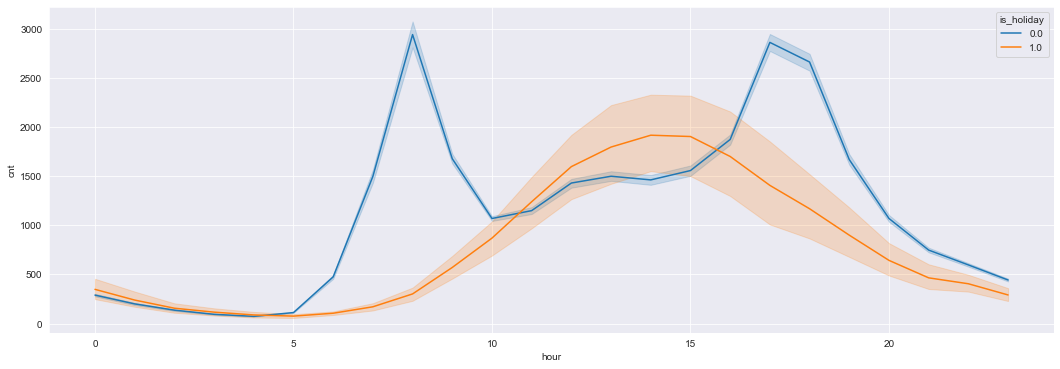

In [40]:
# with lineplot (*whether it is a holiday or not*)

plt.figure(figsize=(18,6))
sns.lineplot(x = "hour", y = "cnt", data=df, hue = "is_holiday");

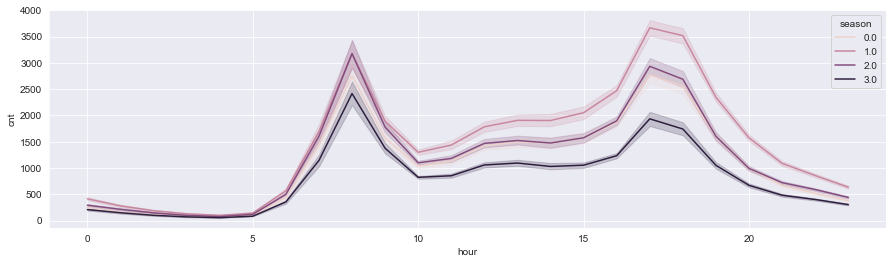

In [41]:
# with lineplot (*You may want to see seasonal breakdowns*)

plt.figure(figsize=(15,4))
sns.lineplot(x = "hour", y = "cnt", data=df, hue = "season");


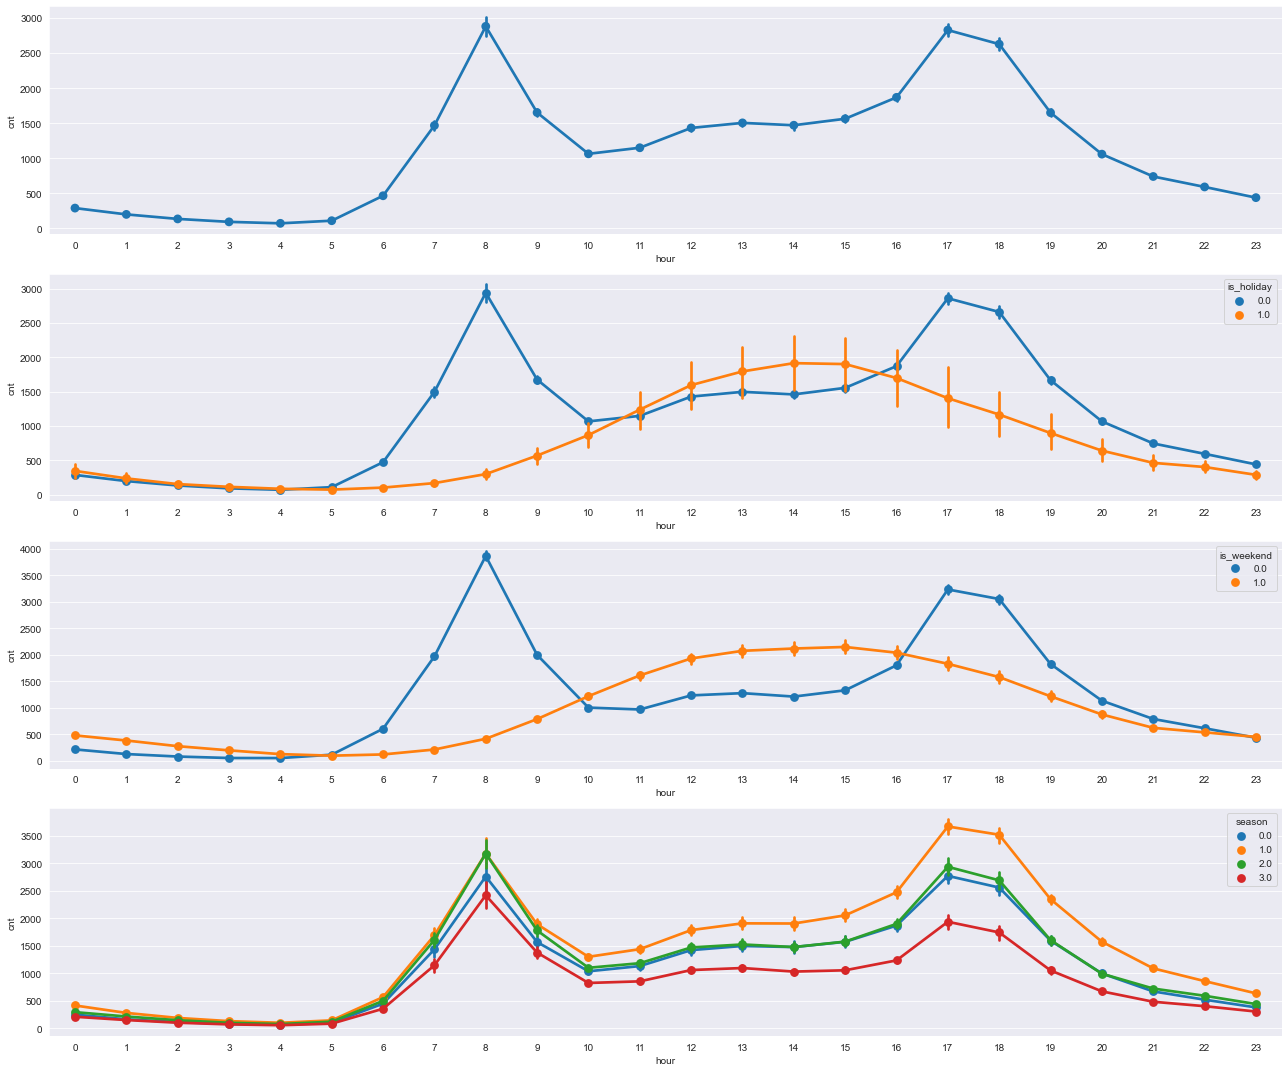

In [42]:
fig, ax = plt.subplots(nrows = 4, figsize = (18,15)) 
# Since nrows and ncols are 1 by default, ncols value is not entered.

sns.pointplot(data = df, x = "hour", y = "cnt", ax = ax[0])
sns.pointplot(data = df, x = "hour", y = "cnt", ax = ax[1],
             hue = "is_holiday")
sns.pointplot(data = df, x = "hour", y = "cnt", ax = ax[2],
             hue = "is_weekend")
sns.pointplot(data = df, x = "hour", y = "cnt", ax = ax[3],
             hue = "season")
plt.tight_layout()

# Plot bike shares by day of week

 You may want to see whether it is holiday or not

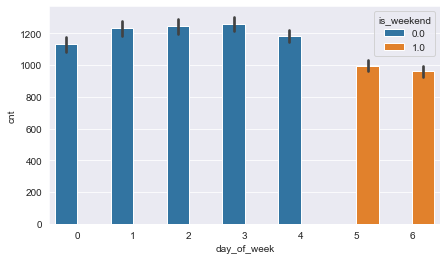

In [43]:
# with barplot

plt.figure(figsize=(7,4))
sns.barplot(x="day_of_week", y="cnt", data=df, hue = "is_weekend");

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

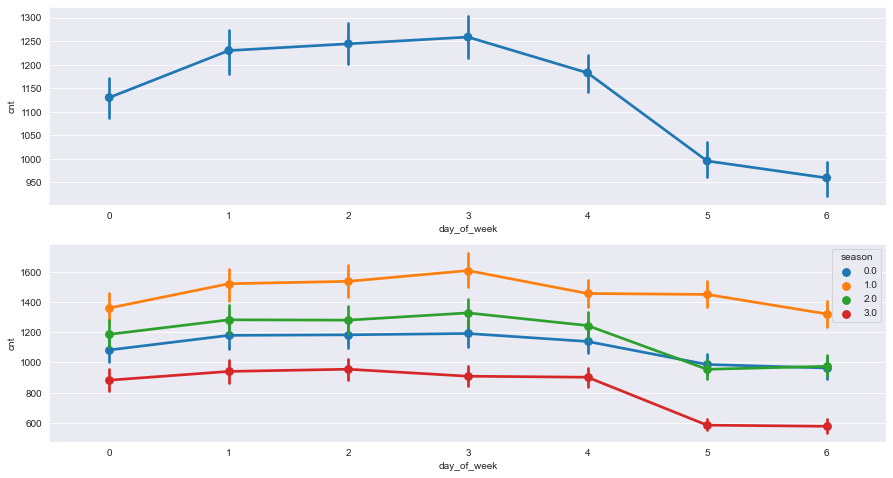

In [44]:
# with pointplot

fig, ax = plt.subplots(2,1, figsize=(15,8))

sns.pointplot(data=df, x="day_of_week", y = "cnt", ax = ax[0])
sns.pointplot(data=df, x="day_of_week", y = "cnt", ax = ax[1], hue = "season")

season - category field meteorological seasons: 0-spring ; 1-summer; 2-
fall; 3-winter.

# Plot bike shares by day of month

In [45]:
#I will group by day_of_month first.Then I'll take the average of your cnt
df.groupby("day_of_month").cnt.mean()

day_of_month
1     1077.455652
2     1088.117754
3     1127.602837
4     1144.492174
5     1140.772727
6     1211.227431
7     1194.151832
8     1222.696491
9     1261.260870
10    1157.453913
11    1203.618467
12    1166.952212
13    1139.221441
14    1123.670139
15    1175.629565
16    1140.871080
17    1182.311847
18    1178.552632
19    1153.147826
20    1115.667832
21    1125.729167
22    1127.717014
23    1173.994792
24    1054.147950
25    1190.786087
26    1081.516637
27    1130.681979
28    1062.750871
29    1079.680581
30    1156.406844
31     968.187311
Name: cnt, dtype: float64

In [46]:
pd.DataFrame(df.groupby("day_of_month").cnt.mean().astype("int")).T

day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,...,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,...,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


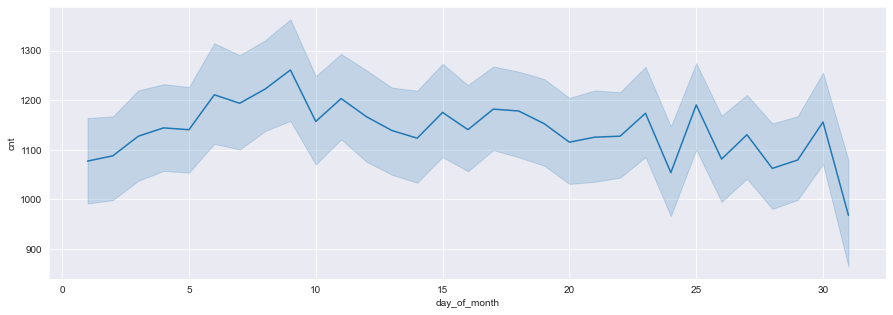

In [47]:
#with lineplot

plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x="day_of_month", y="cnt")
pd.DataFrame(df.groupby("day_of_month").cnt.mean().astype("int")).T

# Plot bike shares by year
Plot bike shares on holidays by seasons

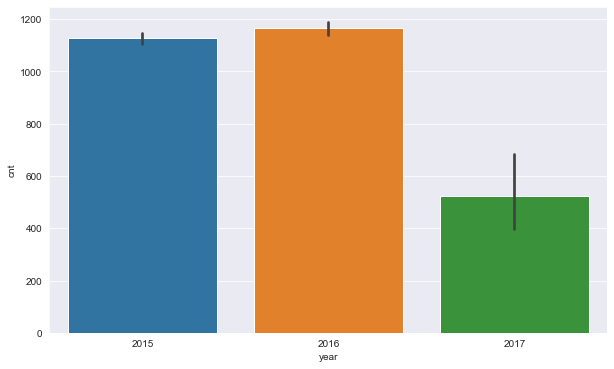

In [49]:
# with barplot

plt.figure(figsize=(10,6))
sns.barplot(data=df, x="year",y="cnt");

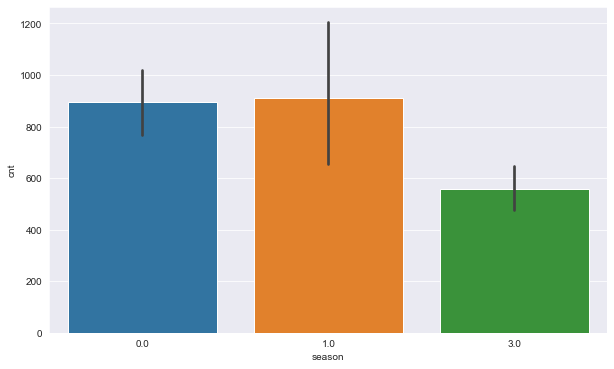

In [51]:
# with barplot
##Let's see the count of the holidays according to the seasons
plt.figure(figsize=(10,6))

sns.barplot(data=df[df["is_holiday"]==1], x="season",y="cnt");

# Visualize the distribution of bike shares by weekday/weeked with peachart and barplot

In [52]:
df.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

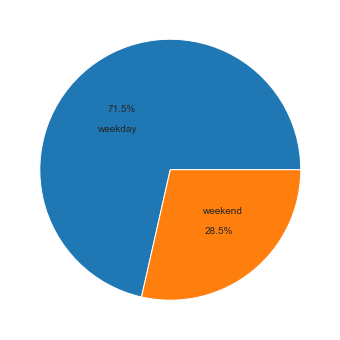

In [53]:
fig, ax = plt.subplots(figsize=(6,6))

ax.pie(df.is_weekend.value_counts(), labels=["weekday","weekend"],
       labeldistance=0.4, autopct="%.1f%%");


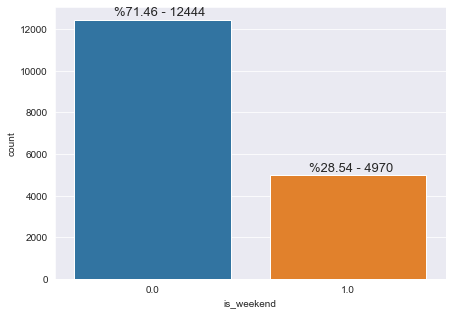

In [54]:
# with countplot

fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(x = "is_weekend", data = df)
for p in ax.patches:
    ax.annotate('%' + str(round((p.get_height()) / df.is_weekend.value_counts().sum() * 100, 2)) + " " + "-" + " " +
                str(p.get_height()), (p.get_x()+0.20, p.get_height()+200), fontsize = 13)
plt.show()


# Plot the distrubution of weather code by seasons

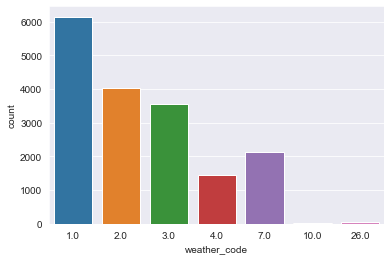

In [55]:
# with countplot

sns.countplot(x="weather_code", data=df);

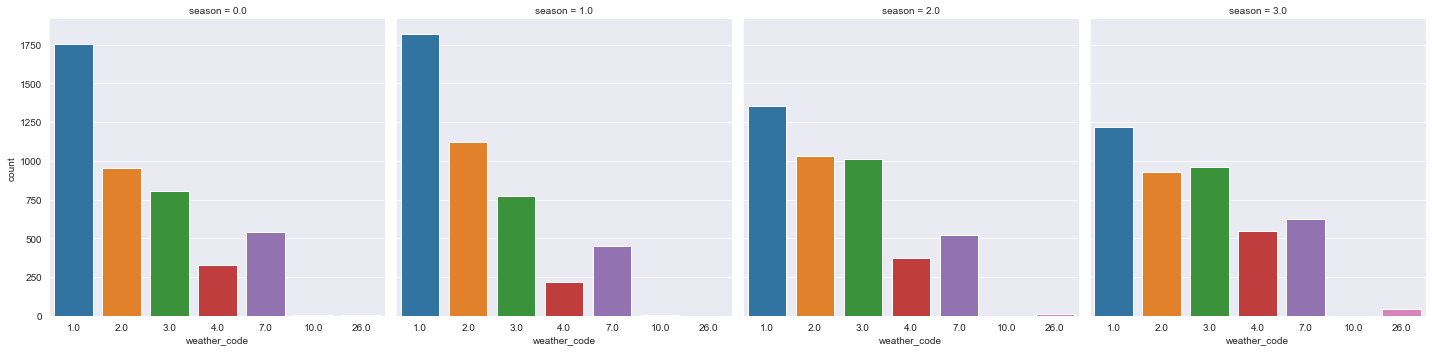

In [56]:
# with catplot

sns.catplot(x = "weather_code", data = df, col = "season", kind = "count");

# Visualize all the continouos variable with histogram and scatterplot

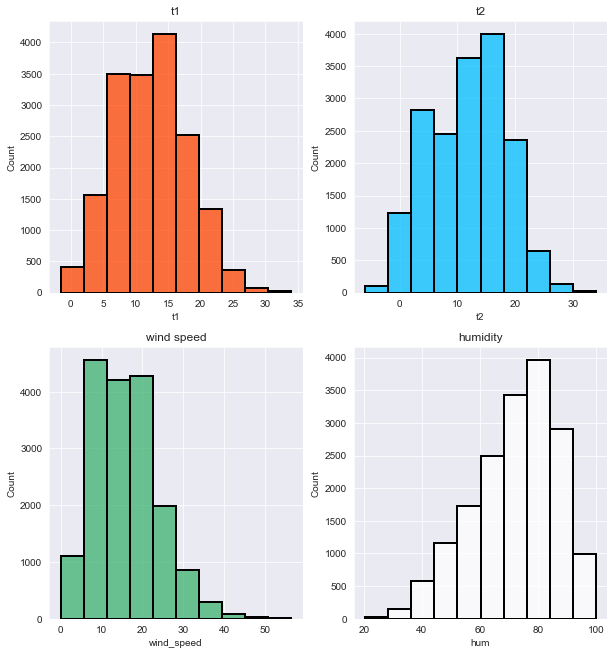

In [57]:
# matplotlip hist

fig , ax = plt.subplots(2,2,figsize=(10,11))

sns.histplot(data=df, x="t1", bins=10, color="orangered", edgecolor = "black", lw = 2, ax=ax[0,0]).set_title("t1")

sns.histplot(data=df, x="t2", bins=10, color="deepskyblue", edgecolor = "black", lw = 2, ax=ax[0,1]).set_title("t2")

sns.histplot(data=df, x="wind_speed", bins=10, color="mediumseagreen", edgecolor = "black", lw = 2, ax=ax[1,0]).set_title("wind speed")

sns.histplot(data=df, x="hum", bins=10, color="white", edgecolor = "black", lw = 2, ax=ax[1,1]).set_title("humidity")

plt.show()

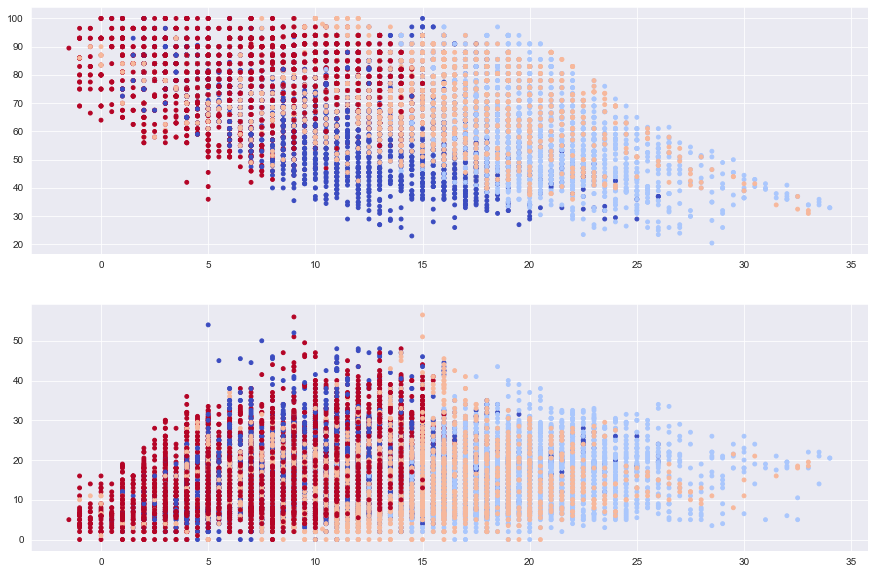

In [58]:
# matplotlib scatterplot

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.scatter(data=df, x="t1", y="hum", c="season", cmap="coolwarm", s = 15)
plt.subplot(2,1,2)
plt.scatter(data=df, x="t1", y="wind_speed", c="season", cmap="coolwarm", s = 15);